# Анализ результатов А/B-тестирования - влияние новой платежной воронки интернет-магазина на конверсию в покупку. 

- Автор: Прудникова Диана.

### Цели и задачи проекта
**Цель**: Проанализировать данные результатов А/В-тестирования новой платежной воронки интернет-магазина, с проведением статистического теста для проверки существования статистически значимой разницы в конверсии в покупку между группами A и B.

**Задачи**:
- Загрузить и подготовить данные,
- Провести исследовательский анализ данных теста:
 - определить какой была конверсия в разных группах,
 - оценить кумулятивную динамику покупок,
- Проверить гипотезу о том, существует ли статистически значимая разница в конверсии в покупку между группами A и B,
- Сформулировать выводы по результатам тестирования и дать рекомендации.

### Содержимое проекта
- Загрузка и подготовка данных:
 - знакомство с данными,
 - преобразование типов данных,
 - исследование уникальных значений в таблицах,
 - фильтрация данных,
 - анализ нулевых сессий,
 - проверка равенства количества участников теста по группам,
 - оценка распределения пользователей по регионам и типам устройств,
-  Исследовательский анализ данных теста:
 - исследование куммулятивной динамики новых пользователей по групппам,
 - исследование куммулятивной динамики количества сессий по группам,
 - исследование куммулятивной динамики покупок по группам,
 - сравнение конверсии в покупку по группам,
- Проверка гипотезы о том, существует ли между группами A и B статистически значимая разница в доле успехов (конверсии):
 - проверка условия независимости выборок,
 - проверка условия о достаточности размера выборок,
 - проведение Z-теста пропорци,
- Выводы и рекомендации по результатам тестирования.

## 1. Загрузка и подготовка данных.

Импортируем необходимые библиотеки.

In [38]:
# Импортируем библиотеки 
import pandas as pd

#Для построения графиков используем библиотеки matplotlib и seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем библиотеку numpy 
import numpy as np

# Импортируем библиотеку для Z-теста 
from statsmodels.stats.proportion import proportions_ztest

Выгружаем данные.

Выводим на экран общую информацию и первые пять строк датафреймов.

In [40]:
# Выводим на экран общую информацию
df_users.info()
df_session.info() 
df_purch.info() 
df_partic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131486 entries, 0 to 131485
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     131486 non-null  object
 1   first_date  131486 non-null  object
 2   region      131486 non-null  object
 3   device      131486 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491443 entries, 0 to 491442
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           491443 non-null  object 
 1   session_start     491443 non-null  object 
 2   session_duration  491443 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149152 entries, 0 to 149151
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_i

In [41]:
# Выводим на экран первые пять строк датафреймов
display (df_users.head())
display (df_session.head())
display (df_purch.head())
display (df_partic.head())

,user_id,first_date,region,device
0,D72A72121175D8BE,2025-06-01,South Asia,iPhone
1,F1C668619DFE6E65,2025-06-01,Southeast Asia,iPhone
2,2E1BF1D4C37EA01F,2025-06-01,Central Asia,Mac
3,50734A22C0C63768,2025-06-01,Central Asia,Android
4,E1BDDCE0DAFA2679,2025-06-01,Southeast Asia,iPhone


,user_id,session_start,session_duration
0,D72A72121175D8BE,2025-06-01 05:51:20,1.0
1,F1C668619DFE6E65,2025-06-01 15:28:14,5.0
2,2E1BF1D4C37EA01F,2025-06-01 16:19:36,3.0
3,50734A22C0C63768,2025-06-01 21:06:51,1.0
4,E1BDDCE0DAFA2679,2025-06-01 10:03:00,2.0


,user_id,event_dt,revenue
0,50734A22C0C63768,2025-06-01 21:06:51,4.99
1,0FC21E6F8FAA8DEC,2025-06-01 06:36:08,4.99
2,9CD9F34546DF254C,2025-06-01 14:40:29,99.99
3,1FD7660FDF94CA1F,2025-06-01 04:53:00,4.99
4,E6AF85675078215D,2025-06-01 11:40:09,4.99


,user_id,group,ab_test
0,6A8825D752FCFFB6,A,new_payment_funnel_test_summer_2025
1,0B75608CBBA59791,B,new_payment_funnel_test_summer_2025
2,6B9D2F7685B83C73,A,new_payment_funnel_test_summer_2025
3,6435D4C2E66A7F75,B,new_payment_funnel_test_summer_2025
4,4F815438BBD2BB7E,A,new_payment_funnel_test_summer_2025


На первый взгляд данные соотвествуют описанию. Названия столбцов представлены в корректном стиле, пропусков не выявлено, типы данных в полях с датой необходимо преобразовать к `datetime64`,в столбцах содержащих числовой тип данных `float64` оптимизируем разрядность. 

**Преобразуем типы данных.**

In [42]:
# Преобразуем столбцы с датой и временем к типу datetime
df_users ['first_date'] = pd.to_datetime(df_users ['first_date'])
df_session ['session_start'] = pd.to_datetime(df_session ['session_start']) 
df_purch ['event_dt'] = pd.to_datetime(df_purch ['event_dt']) 

# Оптимизируем разрядность числовых столбцов
df_session ['session_duration'] = pd.to_numeric (df_session ['session_duration'], downcast='float')
df_purch ['revenue'] = pd.to_numeric (df_purch ['revenue'], downcast='float')

# Выводим информацию о типах данных датафреймов
display (df_users.dtypes)
display (df_session.dtypes)
display (df_purch.dtypes)

user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object

user_id                     object
session_start       datetime64[ns]
session_duration           float32
dtype: object

user_id             object
event_dt    datetime64[ns]
revenue            float32
dtype: object

Типы данных успешно преобразованы.

**Проверим уникальные значения в столбцах с категориальными данными.**

In [43]:
# Выбираем категориальные колонки в df_users 
cat_columns = df_users[['region', 'device']]

# Проверяем уникальные значения в категориальных столбцах df_users
for col in cat_columns:
    unic_values =  df_users[col].unique()
    display (f'Уникальные значения в df_users {col}')
    display ('_'*50)
    display(unic_values)

'Уникальные значения в df_users region'

'__________________________________________________'

array(['South Asia', 'Southeast Asia', 'Central Asia', 'East Asia'],
      dtype=object)

'Уникальные значения в df_users device'

'__________________________________________________'

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [44]:
# Проверяем уникальные значения в df_session ['session_duration'] с сортировкой по убыванию
unic_values_session = np.sort(df_session['session_duration'].unique())

display (f'Уникальные значения в df_session session_duration')
display(unic_values_session)    

'Уникальные значения в df_session session_duration'

array([ 0.  ,  0.44,  0.75,  0.79,  0.93,  1.  ,  1.08,  1.14,  1.15,
        1.3 ,  1.44,  1.48,  1.5 ,  1.54,  1.58,  1.6 ,  1.86,  1.96,
        2.  ,  2.08,  2.14,  2.25,  2.3 ,  2.37,  2.44,  2.48,  2.54,
        2.6 ,  2.79,  2.96,  3.  ,  3.08,  3.14,  3.16,  3.3 ,  3.44,
        3.45,  3.48,  3.54,  3.6 ,  3.72,  3.75,  3.95,  3.96,  4.  ,
        4.08,  4.14,  4.3 ,  4.44,  4.48,  4.5 ,  4.54,  4.6 ,  4.62,
        4.65,  4.74,  4.96,  5.  ,  5.08,  5.14,  5.25,  5.3 ,  5.44,
        5.48,  5.53,  5.54,  5.58,  5.6 ,  5.75,  5.92,  5.96,  6.  ,
        6.08,  6.14,  6.16,  6.3 ,  6.32,  6.44,  6.48,  6.51,  6.54,
        6.6 ,  6.75,  6.9 ,  6.96,  7.  ,  7.08,  7.14,  7.3 ,  7.4 ,
        7.44,  7.48,  7.54,  7.6 ,  7.7 ,  7.96,  8.  ,  8.3 ,  8.54,
        8.88,  9.  ,  9.24,  9.96, 10.  , 10.36, 10.6 , 10.78, 11.  ,
       12.  , 12.32], dtype=float32)

In [45]:
# Проверяем уникальные значения в df_purch ['revenue'] с сортировкой по убыванию
unic_values_purch = np.sort(df_purch['revenue'].unique())

display (f'Уникальные значения в df_purch revenue')
display(unic_values_purch)    

'Уникальные значения в df_purch revenue'

array([  4.99,   9.99,  99.99, 499.99], dtype=float32)

In [46]:
# Выбираем категориальные колонки в df_partic
cat_columns_partic = df_partic[['group', 'ab_test']]

# Проверяем уникальные значения в категориальных столбцах df_partic
for col in cat_columns_partic: 
    unic_values_partic =  df_partic[col].unique()
    display (f'Уникальные значения в df_partic {col}')
    display ('_'*50)
    display(unic_values_partic)

'Уникальные значения в df_partic group'

'__________________________________________________'

array(['A', 'B'], dtype=object)

'Уникальные значения в df_partic ab_test'

'__________________________________________________'

array(['new_payment_funnel_test_summer_2025', 'new_login_screen_apac'],
      dtype=object)

Уникальные значения в категориальных столбцах датафрейма `df_users` корректны, аномалий не обнаружено. В поле с длительностью сессии `session_duration` датасета `df_session` выявлено значение 0, что может быть связано, например с технической ошибкой сбора данных, сбоем интернет-соединения, случайным кликом и т. д. Необходимо проверить количество таких сессий. В столбце с выручкой `revenue` датафрейма `df_purch` экстремальных значений не обнаружено. Датафрейм `df_partic` содержит данные об участниках двух тестов, необходимо отфильтровать датасет, а также остальные таблицы, оставив данные участников анализируемого теста.

**Фильтруем данные датафрейма `df_partic` - оставляем участников анализируемого теста `new_payment_funnel_test_summer_2025`.**

In [47]:
# Фильтруем датафрейм df_partic, оставляем участников необходимого теста
df_part_filter = df_partic[df_partic['ab_test']=='new_payment_funnel_test_summer_2025']

# Проверяем корректность фильтрации 
uniq_test = df_part_filter ['ab_test'].unique()
display (f'Уникальные значения в столбце ab_test {uniq_test}')
display (f'Количество участников теста {len(df_part_filter)}')

"Уникальные значения в столбце ab_test ['new_payment_funnel_test_summer_2025']"

'Количество участников теста 3066'

Фильтрация прошла успешно. 

**Отфильтруем необходимых участников в остальных датафреймах по `user_id`.**

In [48]:
# Выедим список уникальных пользователей, которые учавствовали в тесте
list_test_users = df_part_filter ['user_id'].unique()

# Проверяем результат
display (f'Всего участников {len(list_test_users)}')

# Фильтруем остальные датафреймы по user_id
df_users_filter = df_users [df_users['user_id'].isin(list_test_users)].copy()
display(f'Стало строк в таблице с пользователями: {len(df_users_filter)} (было {len(df_users)})')

df_session_filter = df_session [df_session['user_id'].isin(list_test_users)].copy()
display(f'Стало строк в таблице с сессиями пользователей: {len(df_session_filter)} (было {len(df_session)})')

df_purch_filter = df_purch [df_purch['user_id'].isin(list_test_users)].copy()
display(f'Стало строк в таблице с покупками пользователей: {len(df_purch_filter)} (было {len(df_purch)})')

'Всего участников 3066'

'Стало строк в таблице с пользователями: 3066 (было 131486)'

'Стало строк в таблице с сессиями пользователей: 11321 (было 491443)'

'Стало строк в таблице с покупками пользователей: 2566 (было 149152)'

Данные отфильтрованы успешно.

**Проверим количество нулевых сессий в датафрейме `df_session_filter`.** 

In [49]:
# Считаем количество и процент нулевых сессий
zero_session = (df_session_filter ['session_duration']==0).sum()
zero_percentage_session = round (((zero_session / len(df_session_filter))*100),1)

display (f'Всего нулевых сессий {zero_session}, составляет {zero_percentage_session}% от всех данных')

'Всего нулевых сессий 800, составляет 7.1% от всех данных'

Выявлено 800 сессий из 11321 с нулевой длительностью (7.1%). Это достаточно немалая доля от общего объема, поэтому удаление может повлиять на результаты. 

**Проанализируем нулевые сессии.** Проверим распределение их по группам А и B.

In [50]:
# Объединяем датафреймы по user_id
df_merg = df_session_filter.merge(
    df_part_filter[['user_id', 'group']], on='user_id', how='left',
    suffixes=('', '_from_part'))

display(f'После объединения: {len(df_merg)} строк')

# Проверяем, что все сессии получили информацию о группе
sessions_without_group = df_merg['group'].isnull().sum()
display(f'Сессий без информации о группе: {sessions_without_group}')

'После объединения: 11321 строк'

'Сессий без информации о группе: 0'

Объединение прошло удачно, далее оставим нулевые сессии и проверим распределение сессий участников по группам.

In [51]:
# Фильтруем датафрейм df_merg, оставляем нулевые сессии
zero_session_group = df_merg[df_merg['session_duration']==0] 

In [52]:
# Распределяем нулевые сессии по группам
zero_by_group = zero_session_group.groupby('group')['user_id'].count()
display(f'Распределение нулевых сессий по группам:')
display(zero_by_group)

# Распределяем всех сессии по группам
total_by_group = df_merg.groupby('group')['user_id'].count()
display(f'Распределение всех сессий по группам:')
display(total_by_group)

'Распределение нулевых сессий по группам:'

group
A    800
Name: user_id, dtype: int64

'Распределение всех сессий по группам:'

group
A    5806
B    5515
Name: user_id, dtype: int64

Анализ сессий выявил, что все 800 нулевых сессий находятся только в группе `A`. При этом общее распределение сессий между группами примерно равное, с небольшим перевесом в группе `A` (5806 vs 5515). Тот факт, что все сессии попали только в контрольную группу, может быть неслучаен, возможно это системная ошибка и рекомендуется установить причину такого дисбаланса. 

В нашем случае, для анализа конверсии в покупку будем использовать все данные, включая нулевые сессии, так как это тоже часть пользовательского поведения.

**Проверим равенство количества участников теста по группам.**

In [53]:
# Считаем количество пользователей по группам A и B
distribution_users = df_part_filter.groupby('group')['user_id'].count()
display(distribution_users)

group
A    1598
B    1468
Name: user_id, dtype: int64

Число участников в контрольной и тестовой группах распределено корректно (1598 vs 1468).

**Изучим распределение пользователей по регионам и типам устройств.**

- По регионам.

In [54]:
# Изучим распределение участников теста по регионам
distribution_region = df_users_filter.groupby('region')['user_id'
                    ].nunique().reset_index().sort_values(by='user_id',ascending=False)

distribution_region ['%_user_id'] = distribution_region ['user_id'
                                            ] / distribution_region ['user_id'].sum()
distribution_region ['%_user_id'] = distribution_region ['%_user_id'].round(2)

display (distribution_region)

,region,user_id,%_user_id
3,Southeast Asia,2951,0.96
0,Central Asia,47,0.02
1,East Asia,42,0.01
2,South Asia,26,0.01


Абсолютный лидер в выборке `Southeast Asia` (Юго-Восточная Азия), доминирует с показателем 2951 пользователь (96%). Это указывает на то, что сервис наиболее ориентирован на аудиторию из Юго-Восточной Азии.

- По девайсам.

In [55]:
# Изучим распределение участников теста по девайсам
distribution_device = df_users_filter.groupby('device')['user_id'
                    ].nunique().reset_index().sort_values(by='user_id',ascending=False)

distribution_device ['%_user_id'] = distribution_device ['user_id'
                                            ] / distribution_device ['user_id'].sum()
distribution_device ['%_user_id'] = distribution_device ['%_user_id'].round(2)

display (distribution_device)

,device,user_id,%_user_id
0,Android,1359,0.44
2,PC,794,0.26
3,iPhone,614,0.20
1,Mac,299,0.10


Мы видим, доминирование мобильных устройств : Android (1359 пользователей, 44%) + iPhone (614 пользователей, 20%) = 64% пользователей. Десктопная аудитория составляет меньшую часть: PC (794 пользователя, 26%) + Mac (299 пользователей, 10%) = 36%.

**Вывод по предобработке данных.** В результате исследования и подготовке данных к анализу, было выявлено, что в датафрейме `df_partic` хранится информация об участниках двух тестов. Все таблицы отфильтрованы по пользователям рассматриваемого A/B тестирования: общее число участников 3066, распределение по группам является корректным  (1598 vs 1468).

Также было обнаружено 800 сессий (7.1% от общего объема данных) в группе `A` с длительностью 0 мин., это может указывать на потенциальную системную ошибку. Для дальнейшего анализа конверсии в покупку будем использовать все данные, так как доля нулевых сессий достаточно велика, чтобы их удалить и они являются частью пользовательского поведения.


## 2. Исследовательский анализ данных теста.

**Построим графики кумулятивной динамики метрик и проанализируем их.**

Исследуем куммулятивную динамику новых пользователей по групппам.

In [56]:
# Объединяем таблицу с пользователя с данными о группе
df_users_filter = df_users_filter.merge(
    df_part_filter[['user_id', 'group']], on='user_id', how='left',
    suffixes=('', '_from_part'))

# Группируем пользователей по группе и дате и считаем количество пользователей
cumsum_user = df_users_filter.groupby(['group', 'first_date'])['user_id'
                                                ].nunique().reset_index()

# Разделяем получившуюся таблицу на группы,
# чтобы посчитать куммулятивную сумму количества пользователей по группам
cumsum_a = cumsum_user[cumsum_user['group'] == 'A'].copy()
cumsum_b = cumsum_user[cumsum_user['group'] == 'B'].copy()

# Считаем куммулятивную сумму количества пользователей по группам
cumsum_a['cum_users'] = cumsum_a['user_id'].cumsum()
cumsum_b['cum_users'] = cumsum_b['user_id'].cumsum()

# Объединяем данные
total_cum_users =  pd.concat([cumsum_a, cumsum_b])

display (total_cum_users)

,group,first_date,user_id,cum_users
0,A,2025-06-01,166,166
1,A,2025-06-02,107,273
2,A,2025-06-03,82,355
3,A,2025-06-04,80,435
4,A,2025-06-05,103,538
5,A,2025-06-06,104,642
6,A,2025-06-07,158,800
7,A,2025-06-08,176,976
8,A,2025-06-09,88,1064
9,A,2025-06-10,52,1116


**Построим линейный график куммулятивной динамики новых пользователей по группам.** 

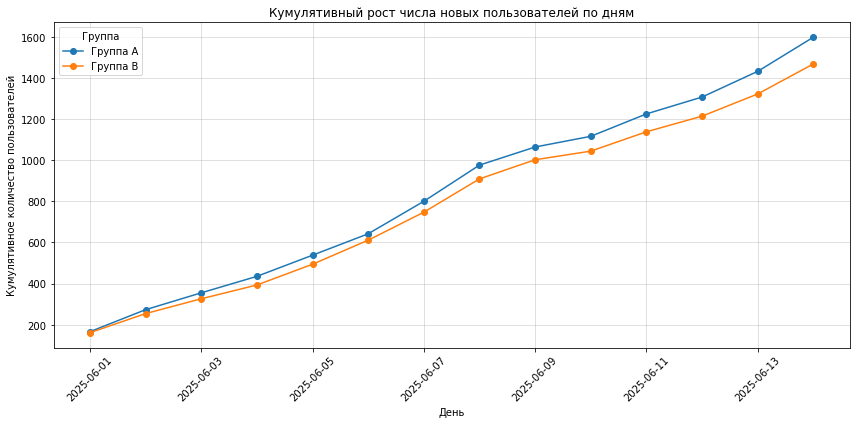

In [57]:
# Создаем сводную таблицу для группировке пользователей по группам
pivot_group = total_cum_users.pivot(index='first_date', 
                                  columns='group', 
                                  values='cum_users')

# Преобразуем индекс обратно в datetime
pivot_group.index = pd.to_datetime(pivot_group.index)

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(pivot_group.index, pivot_group['A'], label='Группа A', marker='o')
plt.plot(pivot_group.index, pivot_group['B'], label='Группа B', marker='o')


plt.title('Кумулятивный рост числа новых пользователей по дням')
plt.xlabel('День')
plt.ylabel('Кумулятивное количество пользователей')
plt.grid(True, alpha=0.5)
plt.legend(title='Группа')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Мы видим, что в контрольной группе `A` число новых пользователей ростет динамичнее на протяжении всего периода, чем в тестовой группе `B` (к концу наблюдения достигает максимальную разницу: 1598 vs 1468 пользователей)


**Построим линейный график куммулятивной динамики количества сессий по группам.** 

In [58]:
# Выделяем дни из времени сессии
df_merg['session_start'] = df_merg['session_start'].dt.date

# Группируем сессии по группе и дате и считаем количество сессий
cumsum_sessions = df_merg.groupby(['group','session_start']).size().reset_index(name ='count_sessions')

# Вычисляем кумулятивное количество сессий для каждой группы
cumsum_sessions['cum_sessions'] = cumsum_sessions.groupby('group')['count_sessions'].cumsum()

display (cumsum_sessions)

,group,session_start,count_sessions,cum_sessions
0,A,2025-06-01,166,166
1,A,2025-06-02,192,358
2,A,2025-06-03,194,552
3,A,2025-06-04,187,739
4,A,2025-06-05,228,967
5,A,2025-06-06,254,1221
6,A,2025-06-07,322,1543
7,A,2025-06-08,390,1933
8,A,2025-06-09,322,2255
9,A,2025-06-10,250,2505


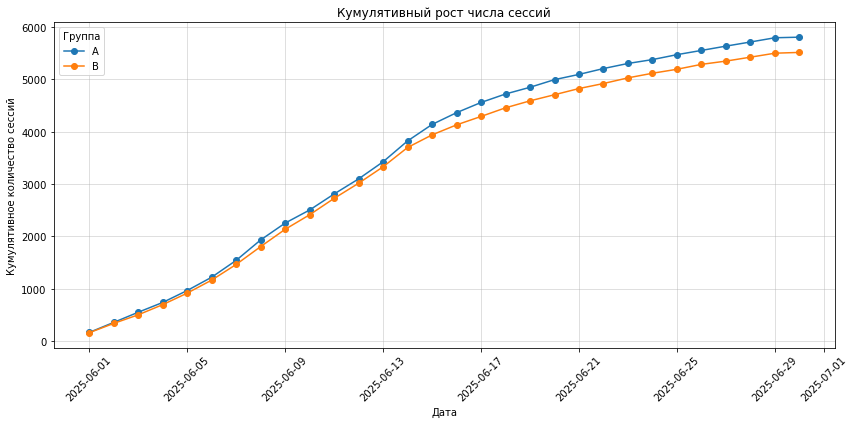

In [59]:
# Создаем сводную таблицу для группировке сессий по группам
pivot_group_sess = cumsum_sessions.pivot(index='session_start', 
                                  columns='group', 
                                  values='cum_sessions')
# Строим график
pivot_group_sess.plot(kind='line', 
                marker='o', figsize=(12, 6))

plt.title('Кумулятивный рост числа сессий')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное количество сессий')
plt.grid(True, alpha=0.5)
plt.legend(title='Группа')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Мы наблюдаем, что контрольная группа `A` демонстрирует лидерство по кумулятивному количеству сессий на протяжении всего периода (разрыв к концу наблюдения составляет 291 сессий). Обе группы показывают синхронную динамику роста, что указывает на схожее поведение пользователей после первоначального привлечения.

**Построим линейный график куммулятивной динамики покупок по группам.**

In [60]:
# Объединяем таблицу с покупками с данными о группе
df_purch_filter = df_purch_filter.merge(
    df_part_filter[['user_id', 'group']], on='user_id', how='left',
    suffixes=('', '_from_part'))

# Выделяем дни из времени покупки
df_purch_filter['event_dt'] = df_purch_filter['event_dt'].dt.date

# Группируем покупки по группе и дате и считаем количество покупок
cumsum_purch = df_purch_filter.groupby(['group','event_dt']).size().reset_index(name ='count_purch')

# Вычисляем кумулятивное количество покупок для каждой группы
cumsum_purch['cum_purch'] =cumsum_purch.groupby('group')['count_purch'].cumsum()

display (cumsum_purch)

,group,event_dt,count_purch,cum_purch
0,A,2025-06-01,44,44
1,A,2025-06-02,49,93
2,A,2025-06-03,38,131
3,A,2025-06-04,37,168
4,A,2025-06-05,71,239
5,A,2025-06-06,57,296
6,A,2025-06-07,58,354
7,A,2025-06-08,106,460
8,A,2025-06-09,96,556
9,A,2025-06-10,75,631


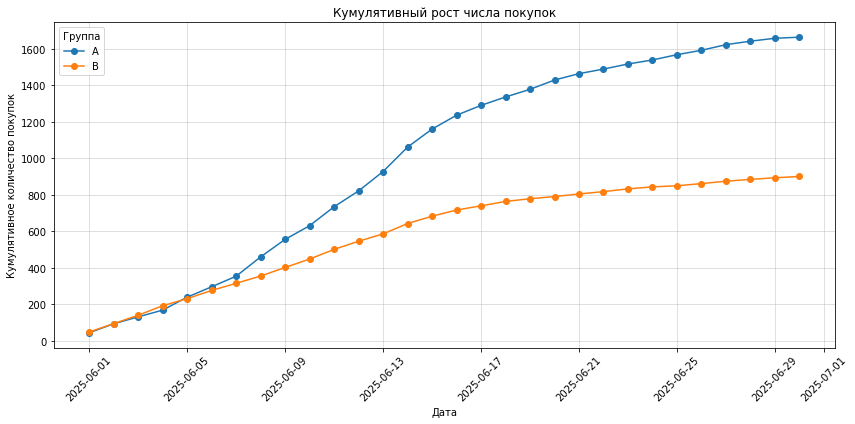

In [61]:
# Создаем сводную таблицу для группировке покупок по группам
pivot_group_purch = cumsum_purch.pivot(index='event_dt', 
                                  columns='group', 
                                  values='cum_purch')
# Строим график
pivot_group_purch.plot(kind='line', 
                marker='o', figsize=(12, 6))

plt.title('Кумулятивный рост числа покупок')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное количество покупок')
plt.grid(True, alpha=0.5)
plt.legend(title='Группа')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На графике видно, что пользователи в группе `A` демонстрируют значительно более высокую покупательскую активность по сравнению с тестовой группой `B`(к концу периода 1665 vs 901). Разрыв между группами постоянно увеличивается на протяжении всего периода. Из этого можно сделать вывод, что эффективность варианта `A` в стимулировании покупок значительно выше.

**Сравним конверсию в покупку в контрольной и тестовой группе.**

In [62]:
# Посчитаем количество уникальных зарегистрировавшихся пользователей по группам
count_unique_users = df_users_filter.groupby('group')['user_id'].nunique().reset_index()

# Посчитаем количество уникальных пользователей,сделавших покупку
count_unique_users_purch = df_purch_filter.groupby('group')['user_id'].nunique().reset_index()

# Объединяем полученные таблицы 
df_total = count_unique_users.merge(
    count_unique_users_purch, on='group', how='left',
    suffixes=('', '_purch'))

# Посчитаем конверсию в покупку для каждой группы
df_total['conversion_to_purchase'] = df_total['user_id_purch'] / df_total['user_id']
df_total['conversion_to_purchase'] = df_total['conversion_to_purchase'].round(2) # Округляем до двух знаков

display (df_total)

,group,user_id,user_id_purch,conversion_to_purchase
0,A,1598,472,0.30
1,B,1468,270,0.18


**Вывод по конверсии в покупку**: контрольная группа `A` демонстрирует существенно более высокую конверсию в покупку (30%), чем тестовая группа `B` (18%). Это свидетельствует значительном преимуществе варианта `A` в эффективности превращения пользователей в покупателей.

## 3. Проверка гипотез.

**Проверим существует ли между группами A и B статистически значимая разница в доле успехов (конверсии):**
- H₀ (Нулевая гипотеза) - конверсия в покупку в группе A равна конверсии в группе B: p_A = p_B,
- H₁ (Альтернативная гипотеза) - конверсия в покупку в группе A не равна конверсии в группе B: p_A ≠ p_B.

В нашем сучае, для сравнения конверсии в покупку, будет корректно проводить `Z-тест пропорций`, так как он позволяет определить, существует ли значимая разница между долями в двух независимых выборках.

Необходимо, чтобы были соблюдены следующие условия:
- независимость данных,
- нормальность выборочного среднего, необходимо проверить выполняется ли предпосылка Z-теста пропорций о достаточном размере выборок,
- случайность и репрезентативность. Данные собраны за одинаковый период времени - с 1 по 21 июня 2025 года.

**Проверим независимость выборок - определим есть ли пересечения по `user_id`.**

In [63]:
# Сохраняем в переменные id юзеров в каждой группе
users_group_A = df_part_filter[df_part_filter['group'] == 'A']['user_id']
users_group_B = df_part_filter[df_part_filter['group'] == 'B']['user_id']

# Ищем пересечения
intersections = list(set(users_group_A) & set(users_group_B))

display(intersections)

[]

Условие независимости выборок выполняется.

**Проверим, выполняется ли условие о достаточности размера выборок.**  Для этого используем следующие показатели: количество зарегистрировавшихся пользователей в каждой группе и количество «успехов», то есть количество пользователей, совершивших покупку. 

In [64]:
# Количество зарегистрировавшихся пользователей в группе A и B
n_a = df_users_filter[df_users_filter['group'] == 'A']['user_id'].nunique()
n_b = df_users_filter[df_users_filter['group'] == 'B']['user_id'].nunique()

# Количество зарегистрировавшихся пользователей в группе A и B, сделавших покупку (количество успехов)
m_a = df_purch_filter[df_purch_filter['group'] == 'A']['user_id'].nunique()
m_b = df_purch_filter[df_purch_filter['group'] == 'B']['user_id'].nunique()


# Доли успехов для каждой группы
p_a = m_a / n_a
p_b = m_b / n_b

print(f'n_a={n_a}, n_b={n_b}')
print(f'm_a={m_a}, m_b={m_b}')
print(f'p_a={p_a}, p_b={p_b}')

if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

n_a=1598, n_b=1468
m_a=472, m_b=270
p_a=0.295369211514393, p_b=0.18392370572207084
Предпосылка о достаточном количестве данных выполняется!


Все условия по проведению теста соблюдены.

**Проведем Z-тест пропорций.** Будем проводить двусторонний тест, так как проверяем различие в любую сторону.

In [72]:
# Устанавливаем уровень значимости
alpha = 0.05

# Z-тест (двусторонний, H₁: p_A ≠ p_B)
stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],  
    [n_a, n_b],  
    alternative='two-sided') # Проверяем различие в любую сторону

print(f'Z-статистика: {stat_ztest}')

if p_value_ztest > alpha:
    print(f'p-value = {p_value_ztest} > {alpha}')
    print('Нулевая гипотеза НЕ отвергается: статистически значимых различий в конверсии нет')
else:
    print(f'p-value = {p_value_ztest:.4f} < {alpha}')
    print('Нулевая гипотеза отвергается: статистически значимые различия в конверсии есть')
    if p_a > p_b:
        print('Группа A имеет значимо более высокую конверсию')
    else:
        print('Группа B имеет значимо более высокую конверсию')

Z-статистика: 7.197472855046176
p-value = 0.0000 < 0.05
Нулевая гипотеза отвергается: статистически значимые различия в конверсии есть
Группа A имеет значимо более высокую конверсию


Мы получили значение `p-value`, которое очень близко к нулю - 0.0000. Это значит, что нет оснований принимать нулевую гипотезу. Таким образом, можно сделать вывод, что существует статистически значимое различие между долями успешных сессий в группах A и B.

##  Выводы и рекомендации.

В процессе исследования данных, было обнаружено 800 нулевых сессий, и все они в контрольной группе `A` (7.1% от общего объёма данных). Это может быть системная ошибка, рекомендуется установить причину такого дисбаланса. Конверсия в покупку рассчитана на всех пользователях, включая тех, кто не показал активности (нулевые сессии). В связи с этим, результаты могут быть смещены,  выявленные различия требуют проверки на A/B-тесте после устранения ошибки.

Распределение на тестовые группы является корректным - контрольная группа `A` 1598, тестовая группа `B` 1468, пересечения пользователей в группах не выявлены, предпосылка о достаточности размера выборок соблюдается.

В результате анализа результатов A/B-тестирования, было установлено, что новая платёжная воронка не привела к увеличению конверсии. Контрольная группа `A` со старой воронкой показывает статистически значимо более высокую конверсию: 30% против 18% в тестовой группе `B`. Нулевая гипотеза отвергается - разница в конверсии в группах A и B является статистически значимой: `p-value` < 0.0001.

`Рекомендация`: стоит отказаться от внедрения новой платёжной воронки, так как она ухудшает показатели конверсии по сравнению с текущим решением. Также, рекомендуется провести анализ причин ухудшения, и доработать решение на основе выявленных проблемных мест.